Hola **Rogelio**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# **Proyecto sprint 10**

## **Descripción del proyecto**

Eres analista en una gran tienda online. Junto con el departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos.

Tienes que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

### **Descripción de los datos**

Datasets del proyecto:




### **Priorización de las hipótesis**

**Dataset: hypotheses_us.csv**

/datasets/hypotheses_us.csv

Descripción de los datos:

* Hypotheses: breves descripciones de las hipótesis.
* Reach: alcance del usuario, en una escala del uno a diez.
* Impact: impacto en los usuarios, en una escala del uno al diez.Confidence: confianza en la hipótesis, en una escala del uno al diez.
* Effort: los recursos necesarios para probar una hipótesis, en una escala del uno al diez. Cuanto mayor sea el valor Effort, más recursos requiere la prueba.

### **Pruebas A/B**

**Dataset: orders_us.csv** 

/datasets/orders_us.csv

Descripción de los datos:

* transactionId: identificador de pedido.
* visitorId: identificador del usuario que realizó el pedido.
* date: fecha del pedido.
* revenue: ingresos del pedido.
* group: el grupo del test A/B al que pertenece el usuario.

**Dataset: visit_us.csv**

/datasets/visits_us.csv

Descripción de los datos:

* date: la fecha.
* group: grupo de la prueba A/B.
* visits: el número de visitas en la fecha especificada en el grupo de pruebas A/B especificado.

Anotaciones:

Es posible que haya errores en los datasets originales; por ejemplo, algunos de los visitantes podrían haber entrado tanto en el grupo A como en el grupo B.

## **Objetivo**

Priorizar las hipótesis y analizar los resultados de la prueba A/B aplicada para soportar la toma de decisión del negocio. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buena práctica el redactar una introducción y pasos de lo que harás en el proyecto, te invito a seguir manteniendo esta práctica
</div>

## **Revisión y análisis de los datasets**

### **Carga de librerías**

In [1]:
# Cargar todas las librerías

try:

    import pandas as pd
    import numpy as np
    import seaborn as sns
    from math import factorial
    from scipy import stats as st
    from matplotlib import pyplot as plt
    import datetime as dt
    print('Librerías cargadas con éxito')

except Exception as error :
    print('Error en carga de librerias', error)

Librerías cargadas con éxito


### **Carga de datasets**

In [2]:
# Carga de datasets

try:
    hipotesis = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
    orders = pd.read_csv('/datasets/orders_us.csv')
    visits = pd.read_csv('/datasets/visits_us.csv')
    print('Datasets cargados con éxito')
    
except:
    print('Error al cargar datasets')
        

Datasets cargados con éxito


### **Revisión de los datos**

#### **Dataset: hipotesis**

In [3]:
# Info del dataset

print('Información general del dataset: hipotesis')

print()

print(hipotesis.info())

Información general del dataset: hipotesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None


In [4]:
# Muestra del dataset

print('Muestra del dataset:')

print()

print(hipotesis.head(10))

Muestra del dataset:

                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   
5  Add a customer review page. This will increase...      3       2   
6  Show banners with current offers and sales on ...      5       3   
7  Add a subscription form to all the main pages....     10       7   
8  Launch a promotion that gives users discounts ...      1       9   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  
5           2       3  
6           8       3  
7           8       5  
8           9       5  


In [5]:
# Valores de la columna 'Hypothesis'

print("Hipótesis a priorizar:")

print()

print(hipotesis['Hypothesis'].unique())

Hipótesis a priorizar:

['Add two new channels for attracting traffic. This will bring 30% more users'
 'Launch your own delivery service. This will shorten delivery time'
 "Add product recommendation blocks to the store's site. This will increase conversion and average purchase size"
 'Change the category structure. This will increase conversion since users will find the products they want more quickly'
 'Change the background color on the main page. This will increase user engagement'
 'Add a customer review page. This will increase the number of orders'
 'Show banners with current offers and sales on the main page. This will boost conversion'
 'Add a subscription form to all the main pages. This will help you compile a mailing list'
 'Launch a promotion that gives users discounts on their birthdays']


**Observaciones del dataset**

* 5 columnas con 9 filas
* Los encabezados de columnas no se encuentran en formato snake_case, es necesario cambiar.
* Los tipos de datos son correctos
* No hay valores ausentes ni duplicados.


**Cambios al dataset**

In [6]:
# Corrección de encabezados a estilo snake_case

hipotesis.columns = ['hipotesis', 'reach', 'impact', 'confidence', 'effort']

print('Muestra del cambio:')

print()

print(hipotesis.head(2))


Muestra del cambio:

                                           hipotesis  reach  impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   

   confidence  effort  
0           8       6  
1           4      10  


#### **Dataset: orders**

In [7]:
# Info del dataset

print('Información general del dataset: orders')

print()

print(orders.info())

Información general del dataset: orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
None


In [8]:
# Muestra del dataset

print('Muestra del dataset:')

print()

print(orders.head(10))

Muestra del dataset:

   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     30.4     B
1     2804400009  3642806036  2019-08-15     15.2     B
2     2961555356  4069496402  2019-08-15     10.2     A
3     3797467345  1196621759  2019-08-15    155.1     B
4     2282983706  2322279887  2019-08-15     40.5     B
5      182168103   935554773  2019-08-15     35.0     B
6      398296753  2900797465  2019-08-15     30.6     B
7     2626614568    78758296  2019-08-15     20.1     A
8     1576988021   295230930  2019-08-15    215.9     A
9     1506739906  1882260405  2019-08-15     30.5     B


In [9]:
# Validación de los valores de la columna 'group'

print("Valores únicos de la columna 'group':")

print()

print(orders['group'].unique())

Valores únicos de la columna 'group':

['B' 'A']


In [10]:
# Validación de valores duplicados

print('Valores duplicados del dataset:', orders.duplicated().sum())


Valores duplicados del dataset: 0


In [11]:
# Validación de los visitantes por grupo de prueba

usuarios_grupo = orders.pivot_table(index='visitorId', columns='group', aggfunc='size', fill_value=0)

print(usuarios_grupo)

group       A  B
visitorId       
5114589     0  1
6958315     0  1
8300375     1  1
11685486    1  0
39475350    0  1
...        .. ..
4266935830  1  1
4278982564  1  0
4279090005  0  1
4281247801  0  1
4283872382  0  1

[1031 rows x 2 columns]


**Observaciones del dataset**

* 5 columnas con 1,197 filas
* Los encabezados de columnas no se encuentran en formato snake_case, es necesario cambiar.
* Los datos de fecha no se encuentran en el formato datetime, es necesario cambiar.
* No hay valores ausentes, ni duplicados.
* Existen visitantes que estan considerados tanto en el grupo A como en el grupo B, se identificaran estos usuarios.


**Cambios al dataset**

In [12]:
# Corrección de encabezados a estilo snake_case

orders.columns = ['transaction_id', 'visitor_id','date', 'order_revenue', 'group']

print('Muestra del cambio:')

print()

print(orders.head(2))


Muestra del cambio:

   transaction_id  visitor_id        date  order_revenue group
0      3667963787  3312258926  2019-08-15           30.4     B
1      2804400009  3642806036  2019-08-15           15.2     B


In [13]:
# Cambio de tipo de datos de date

orders['date'] = orders['date'].map(
lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   order_revenue   1197 non-null   float64       
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB
None


In [14]:
# Tabla dinamica a dataframe

usuarios_grupo = pd.DataFrame(usuarios_grupo).reset_index()


In [15]:
# Identificación de los visitantes que se encuentran registrados en ambos grupos

usuarios_grupo_duplicado = usuarios_grupo[(usuarios_grupo['A'] >= 1) & (usuarios_grupo['B'] >= 1)]  # Filtro de usuarios en ambos grupos

usuarios_grupo_duplicado.columns = ['visitor_id', 'A', 'B']

print('Usuarios registrados en ambos grupos (A & B):', usuarios_grupo_duplicado['visitor_id'].count())

print()

print(usuarios_grupo_duplicado.head())

Usuarios registrados en ambos grupos (A & B): 58

    visitor_id  A  B
2      8300375  1  1
44   199603092  4  1
51   232979603  1  1
55   237748145  4  1
66   276558944  1  1


In [16]:
# Muestra de usuario registrado en ambos grupos

muestra_usuario_duplicado = orders[orders['visitor_id'] ==  199603092]

print('Muestra de usuario registrado en ambos grupos:')

print()

print(muestra_usuario_duplicado)

Muestra de usuario registrado en ambos grupos:

      transaction_id  visitor_id       date  order_revenue group
26        2223239646   199603092 2019-08-15           55.7     A
134         62794304   199603092 2019-08-22          110.3     A
246        437656952   199603092 2019-08-02           55.7     B
823       2971973105   199603092 2019-08-27           45.9     A
1102      1941707234   199603092 2019-08-12          100.0     A


#### **Dataset: visits**

In [17]:
# Info del dataset

print('Información general del dataset: visits')

print()

print(visits.info())

Información general del dataset: visits

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


In [18]:
# Muestra del dataset

print('Muestra del dataset:')

print()

print(visits.head(10))

Muestra del dataset:

         date group  visits
0  2019-08-01     A     719
1  2019-08-02     A     619
2  2019-08-03     A     507
3  2019-08-04     A     717
4  2019-08-05     A     756
5  2019-08-06     A     667
6  2019-08-07     A     644
7  2019-08-08     A     610
8  2019-08-09     A     617
9  2019-08-10     A     406


In [19]:
# Validación de los valores de la columna 'group'

print("Valores únicos de la columna 'group':")

print()

print(visits['group'].unique())

Valores únicos de la columna 'group':

['A' 'B']


In [20]:
# Validación de valores duplicados

print('Valores duplicados del dataset:', orders.duplicated().sum())


Valores duplicados del dataset: 0


**Observaciones del dataset**

* 3 columnas con 63 filas
* Los encabezados de columnas se encuentran en formato snake_case.
* Los datos de fecha no se encuentran en el formato datetime, es necesario cambiar.
* No hay valores ausentes, ni duplicados.


**Cambios al dataset**

In [21]:
# Cambio de tipo de datos de date

visits['date'] = visits['date'].map(
lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

print(visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None


## **Priorización de hipótesis**

In [22]:
# Hipótesis a priorizar

print('Hipótesis a priorizar:')

print()

print(hipotesis.head(10))

Hipótesis a priorizar:

                                           hipotesis  reach  impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   
5  Add a customer review page. This will increase...      3       2   
6  Show banners with current offers and sales on ...      5       3   
7  Add a subscription form to all the main pages....     10       7   
8  Launch a promotion that gives users discounts ...      1       9   

   confidence  effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  
5           2       3  
6           8       3  
7           8       5  
8           9       5  


### **Framework ICE**

In [23]:
# Calcular ICE, ordenado en forma descendente de prioridad

hipotesis['ICE'] = round((hipotesis['impact'] * hipotesis['confidence']) / hipotesis['effort'],2)

print('Prioridad de hipotesis por framework ICE:')

print(hipotesis[['hipotesis', 'ICE']].sort_values(by='ICE', ascending=False))


Prioridad de hipotesis por framework ICE:
                                           hipotesis    ICE
8  Launch a promotion that gives users discounts ...  16.20
0  Add two new channels for attracting traffic. T...  13.33
7  Add a subscription form to all the main pages....  11.20
6  Show banners with current offers and sales on ...   8.00
2  Add product recommendation blocks to the store...   7.00
1  Launch your own delivery service. This will sh...   2.00
5  Add a customer review page. This will increase...   1.33
3  Change the category structure. This will incre...   1.12
4  Change the background color on the main page. ...   1.00


### **Framework RICE**

In [24]:
# Calcular RICE, ordenado en forma descendente de prioridad

hipotesis['RICE'] = round((hipotesis['reach'] * hipotesis['impact'] * hipotesis['confidence']) / hipotesis['effort'],2)

print('Prioridad de hipotesis por framework RICE:')

print(hipotesis[['hipotesis', 'RICE']].sort_values(by='RICE', ascending=False))


Prioridad de hipotesis por framework RICE:
                                           hipotesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


### **Conclusiones de la priorización de hipótesis**

Al realizar la evaluación por **ICE**, encontramos que la hipótesis: **'Launch a promotion that gives users discounts on their birthdays'** se encuentra en primer lugar con 16.20 de score, sin embargo, existen 2 hipótesis relativamente cercanas a esta evaluación.

Con el método ICE estamos dejando de lado ‘reach’, es decir, el número de usuarios que se verán alcanzados por el cambio que se piensa implantar, dato con el que se cuenta.

Aplicando el framework **RICE**, que incluye ‘reach’, se encuentra que la hipótesis: **'Add a subscription form to all the main pages. This will help you compile a mailing list'**, es la que tiene el mayor score de priorización entre las hipótesis presentadas.

Cabe mencionar que la principal diferencia entre ambas hipótesis es 'reach' donde 'Launch a promotion', tiene un 'reach' de 1 (pocos usuarios alcanzados), y 'Add a subscription form...' tiene un 'reach' de 10 (La mayoría de los usuarios alcanzados).

Por lo anterior, la hipóteisis: **'Add a subscription form to all the main pages. This will help you compile a mailing list'**, debe ser la prioritaria a probar ya que tiene un gran potencial de impacto, alto nivel de confianza y un esfuerzo relativamente bajo, en comparación con las otras hipótesis evaluadas.


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con el cálculo para la priorización con los diferentes frameworks! También podrías presentar en gráfica este tipo de comparaciones ya que es es muy bueno para que sea mucho más entendible la comparación
</div>

## **Análisis del test A/B**

### **Filtrar los usuarios que aparecen en ambos grupos de orders**

In [25]:
# Filtrar los usuarios que aparecen en ambos grupos del dataset

orders_ = orders[~orders['visitor_id'].isin(usuarios_grupo_duplicado)]

print(orders_.head())

   transaction_id  visitor_id       date  order_revenue group
0      3667963787  3312258926 2019-08-15           30.4     B
1      2804400009  3642806036 2019-08-15           15.2     B
2      2961555356  4069496402 2019-08-15           10.2     A
3      3797467345  1196621759 2019-08-15          155.1     B
4      2282983706  2322279887 2019-08-15           40.5     B


### **Ingreso acumulado por grupo**

In [26]:
# crea una matriz con valores únicos de parejas fecha-grupo

dates_groups = orders_[['date', 'group']].drop_duplicates()

print(dates_groups.head())

         date group
0  2019-08-15     B
2  2019-08-15     A
45 2019-08-16     A
47 2019-08-16     B
55 2019-08-01     A


In [27]:
# Crear las ordenes acumuladas por fecha - grupo

orders_acumuladas = dates_groups.apply(lambda x: orders_[np.logical_and(orders_['date'] <= x['date'], orders_['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : pd.Series.nunique, 'visitor_id' : pd.Series.nunique, 'order_revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

print('Ingresos acumulados:')

print()

print(orders_acumuladas.head())

Ingresos acumulados:

          date group  transaction_id  visitor_id  order_revenue
55  2019-08-01     A              24          20         2356.8
66  2019-08-01     B              21          20         1620.0
175 2019-08-02     A              44          38         3860.3
173 2019-08-02     B              45          43         4243.8
291 2019-08-03     A              68          62         5675.5


In [28]:
# Crear las visitas acumuladas por fecha - grupo

visits_acumuladas = dates_groups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

print('Visitas acumulados:')

print()

print(visits_acumuladas.head())

Visitas acumulados:

          date group  visits
55  2019-08-01     A     719
66  2019-08-01     B     713
175 2019-08-02     A    1338
173 2019-08-02     B    1294
291 2019-08-03     A    1845


In [29]:
# Fusionar tablas de ingresos y visitas

data_acumulada = orders_acumuladas.merge(visits_acumuladas, left_on = ['date', 'group'], right_on = ['date','group'])

# Cambiar nombres de columnas

data_acumulada.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']

print('Muestra de data acumulada:')

print()

print(data_acumulada.head(6))


Muestra de data acumulada:

        date group  orders  buyers  revenue  visits
0 2019-08-01     A      24      20   2356.8     719
1 2019-08-01     B      21      20   1620.0     713
2 2019-08-02     A      44      38   3860.3    1338
3 2019-08-02     B      45      43   4243.8    1294
4 2019-08-03     A      68      62   5675.5    1845
5 2019-08-03     B      61      59   6050.6    1803


(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.,
        18140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

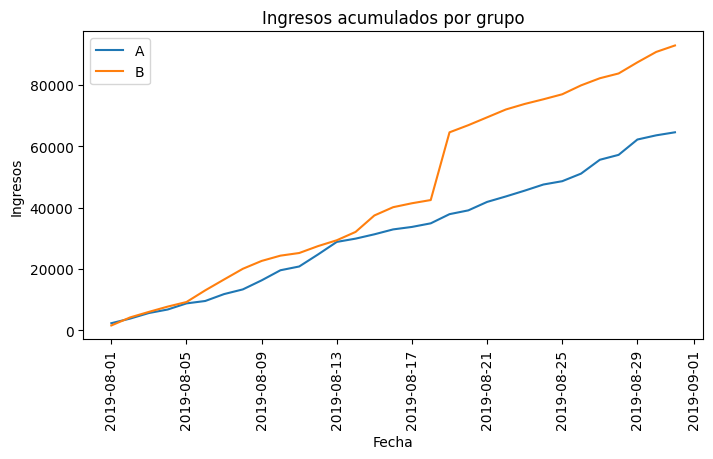

In [30]:
# Gráficos de ingresos acumulados por día y grupo de prueba A/B

# Grupo A: pedidos e ingresos acumulados por día

A_revenue_acumulado = data_acumulada[data_acumulada['group'] == 'A'][['date', 'revenue', 'orders']]

# Grupo B: pedidos e ingresos acumulados por día

B_revenue_acumulado = data_acumulada[data_acumulada['group'] == 'B'][['date', 'revenue', 'orders']]

# Grupo A: gráfico de ingresos

plt.figure(figsize = (8, 4))

plt.plot(A_revenue_acumulado['date'], A_revenue_acumulado['revenue'], label='A')

# Grupo B: gráfico de ingresos

plt.plot(B_revenue_acumulado['date'], B_revenue_acumulado['revenue'], label='B')

plt.legend()
plt.title('Ingresos acumulados por grupo')
plt.xlabel('Fecha')
plt.ylabel('Ingresos')
plt.xticks(rotation = 90)


#### **Conclusiones: ingreso acumulado por grupo**

* Los ingresos aumentan consistentemente en el grupo B a partir del 5 día.
* El grupo B presenta varios picos, especialmente despúes del día 17, es importante revisar, los montos de compras de los usuarios.
* El grupo A presenta un incremento de ingresos mas estable, menos picos en la curva de incremento.

### **Tamaño de pedido promedio acumulado por grupo**

(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.,
        18140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

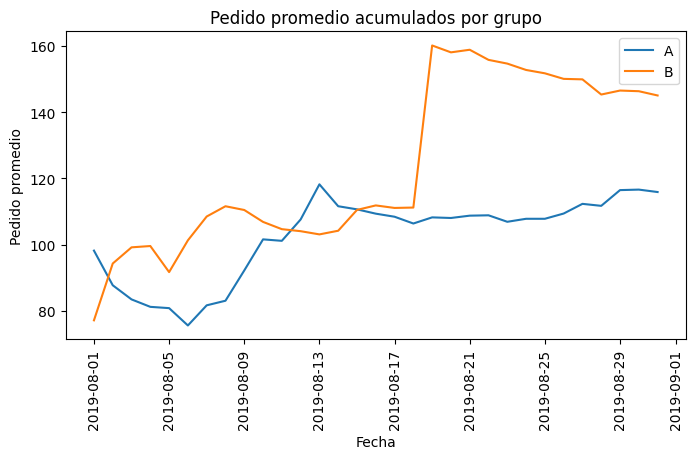

In [31]:
# Gráfica de pedido promedio acumulado por grupo

# Grupo A: pedido promedio

plt.figure(figsize = (8, 4))

plt.plot(A_revenue_acumulado['date'], A_revenue_acumulado['revenue'] / A_revenue_acumulado['orders'], label='A')

# Grupo B: pedido promedio

plt.plot(B_revenue_acumulado['date'], B_revenue_acumulado['revenue'] / B_revenue_acumulado['orders'], label='B')

plt.legend()
plt.title('Pedido promedio acumulados por grupo')
plt.xlabel('Fecha')
plt.ylabel('Pedido promedio')
plt.xticks(rotation = 90)

#### **Conclusiones: pedido promedio acumulado por grupo**

* El tamaño promedio del pedido acumulado incremente en ambos grupos, sin embargo, a mitad de mes el grupo ‘A’ presenta un pico sobre el grupo ‘B’.
* Después del día 13 el grupo ‘B’ tiene un pico bastante considerable de incremento sobre el grupo ‘A’.
* El grupo ‘A’ inicia a tener un comportamiento más estable con incremento al final de la prueba.
* Después del pico el grupo ‘B’ tiene un comportamiento a la baja hasta el final de la prueba.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo, la visualización deja ver la diferencia claramente por cada grupo
</div>

### **Diferencia relativa del tamaño de pedido promedio acumulado por grupo**

(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.,
        18140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

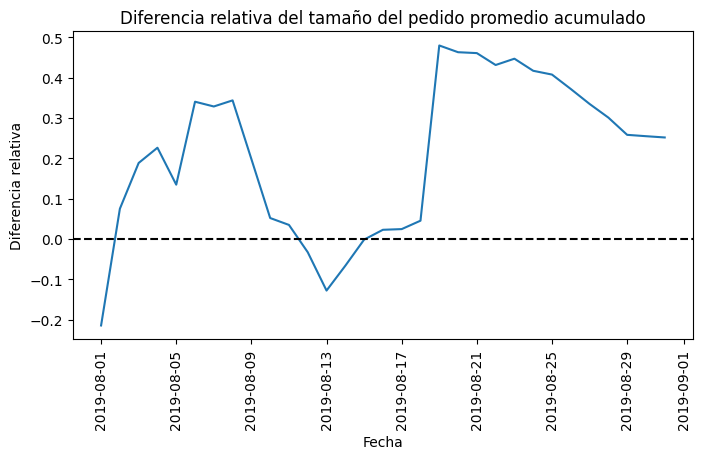

In [32]:
# Gráfica de la diferencia relativa del tamaño del pedido promedio

# Unir los datos acumulados de los grupos

revenue_acumulado_unido = A_revenue_acumulado.merge(B_revenue_acumulado, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Gráfico de diferencia relativa para los tamaños de compra promedio

plt.figure(figsize = (8, 4))

plt.plot(revenue_acumulado_unido['date'], (revenue_acumulado_unido['revenueB'] / revenue_acumulado_unido['ordersB']) / (revenue_acumulado_unido['revenueA'] / revenue_acumulado_unido['ordersA'])-1)

# agregar el eje X

plt.axhline(y=0, color='black', linestyle='--')

plt.title('Diferencia relativa del tamaño del pedido promedio acumulado')
plt.xlabel('Fecha')
plt.ylabel('Diferencia relativa')
plt.xticks(rotation = 90)

#### **Conclusiones: Diferencia relativa del tamaño del pedido promedio acumulado**

* En varios puntos de la gráfica se puede observar que las diferencias aumentan considerablemente.
* Es muy probable que existan valores atípicos importantes así como pedidos de montos considerables, especialmente a partir del día 17.


### **Conversión acumulada**

(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.,
        18140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

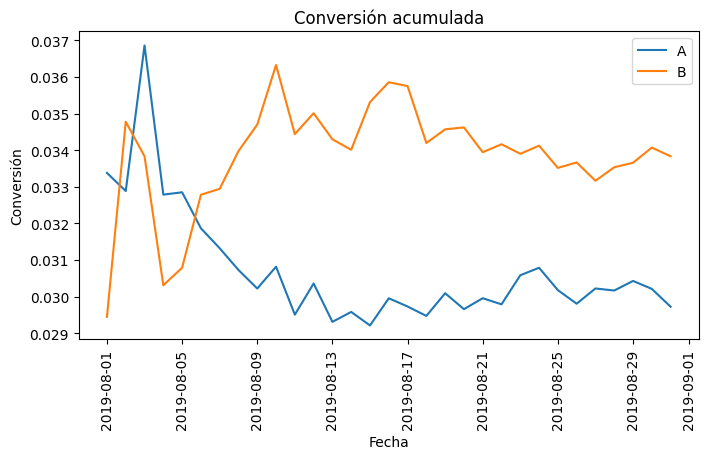

In [33]:
# Gráfico de conversión acumulada

# calcular la conversión acumulada

data_acumulada['conversion'] = data_acumulada['orders'] / data_acumulada['visits']

# Grupo A

A_data_acumulada = data_acumulada[data_acumulada['group'] == 'A']

# Grupo B

B_data_acumulada = data_acumulada[data_acumulada['group'] == 'B']

# trazar los gráficos

# Grupo A: gráfica

plt.figure(figsize = (8, 4))

plt.plot(A_data_acumulada['date'], A_data_acumulada['conversion'], label='A')

# Grupo B: gráfica

plt.plot(B_data_acumulada['date'], B_data_acumulada['conversion'], label='B')

plt.legend()
plt.title('Conversión acumulada')
plt.xlabel('Fecha')
plt.ylabel('Conversión')
plt.xticks(rotation = 90)

#### **Conclusiones: Tasa de conversión acumulada**

* Al inicio de la prueba la tasa de conversión incremento para ambos grupos, pero cayendo en el tercer día.
* A partir del día 4 el grupo ‘B’ incrementa constantemente la tasa de conversión, contando con algunos picos, inicia a estabilizarse en los últimos días de la prueba.
* El grupo ‘A’ tiene una caída considerable después del pico inicia, se estabiliza a partir de medio mes, sin embargo, después de un ligero pico vuelve a caer y cierra a la baja.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente trabajo con las visualizaciones y conclusiones desde las mismas, se pueden ver de manera correcta las diferencias entre grupos
</div>

### **Diferencia relativa de las tasas de conversión acumulada**

(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.,
        18140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

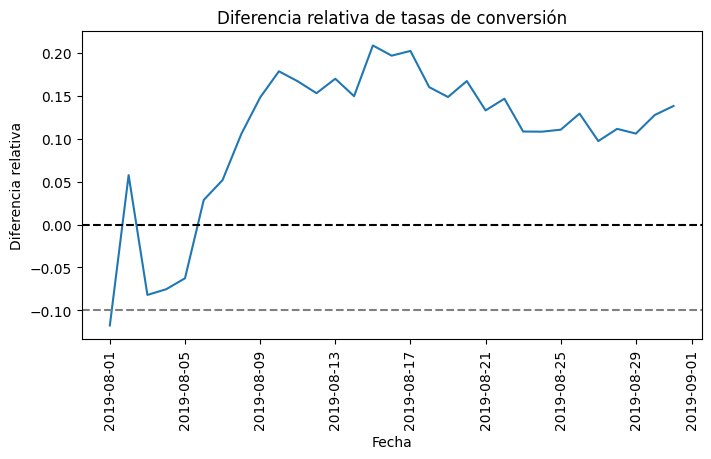

In [34]:
# Gráficos de diferencia relativa de las tasas de conversión

# Unir tasas de conversión acumuladas

conversion_acumulada_unida = A_data_acumulada[['date','conversion']].merge(B_data_acumulada[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Gráfica diferencia relativa

plt.figure(figsize = (8, 4))

plt.plot(conversion_acumulada_unida['date'], conversion_acumulada_unida['conversionB'] / conversion_acumulada_unida['conversionA']-1)

# Lineas de ejes

plt.axhline(y=0, color='black', linestyle='--')

plt.axhline(y=-0.1, color='grey', linestyle='--')

plt.title('Diferencia relativa de tasas de conversión')
plt.xlabel('Fecha')
plt.ylabel('Diferencia relativa')
plt.xticks(rotation = 90)

#### **Conclusiones: Diferencia realtiva de las tasas de conversión acumulada**

* Al inicio el grupo ‘B’ tuvo un incremento de conversión pero prácticamente en el mimo instante cayó considerablemente.
* A partir del día 4 inicia a presentar incremento constante en las tasas de conversión, logrando el pico máximo a medio mes.
* En la segunda mitad del mes, las tasas de conversión caen pero no a un ritmo crítico, volviendo a tener recuperación en los últimos días de prueba, indicando una posible estabilización.


### **Dispersión de los pedidos por usuario**

Text(0, 0.5, 'Revenue')

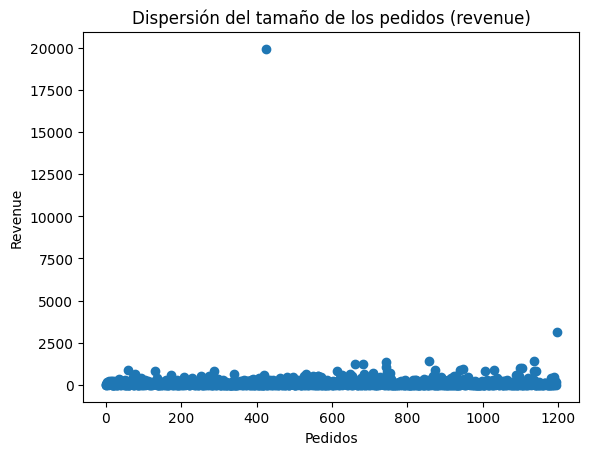

In [35]:
# Gráfico de dispersión de los pedidos por usuario

# Definir los valores del eje X

x_valores = pd.Series(range(0,len(orders_['order_revenue'])))

# Gráfico de dispersión

plt.scatter(x_valores, orders_['order_revenue'])

plt.title('Dispersión del tamaño de los pedidos (revenue)')
plt.xlabel('Pedidos')
plt.ylabel('Revenue')


Text(0, 0.5, 'Revenue')

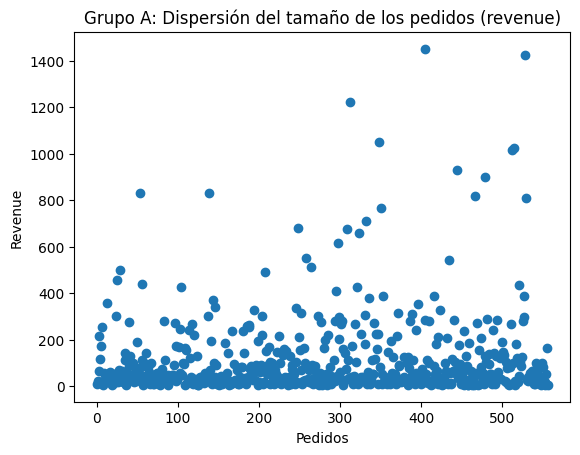

In [36]:
# Gráfico de dispersión de los pedidos por usuario por grupo

# Grupo A

orders_A = orders_[orders_['group'] == 'A']

# Definir los valores del eje X

x_valores_A = pd.Series(range(0,len(orders_A['order_revenue'])))

# Gráfico de dispersión

plt.scatter(x_valores_A, orders_A['order_revenue'])

plt.title('Grupo A: Dispersión del tamaño de los pedidos (revenue)')
plt.xlabel('Pedidos')
plt.ylabel('Revenue')

Text(0, 0.5, 'Revenue')

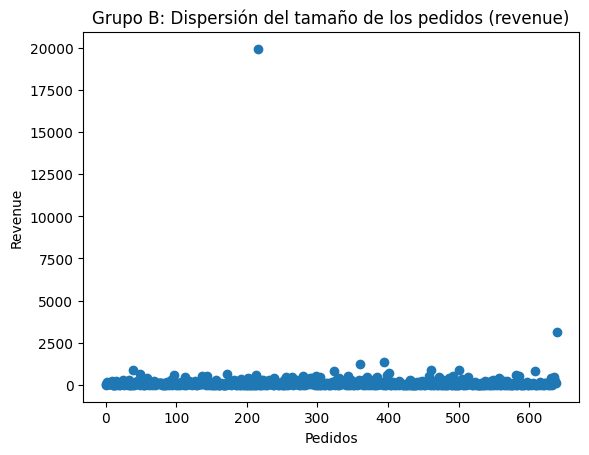

In [37]:
# Gráfico de dispersión de los pedidos por usuario por grupo

# Grupo B

orders_B = orders_[orders_['group'] == 'B']

# Definir los valores del eje X

x_valores_B = pd.Series(range(0,len(orders_B['order_revenue'])))

# Gráfico de dispersión

plt.scatter(x_valores_B, orders_B['order_revenue'])

plt.title('Grupo B: Dispersión del tamaño de los pedidos (revenue)')
plt.xlabel('Pedidos')
plt.ylabel('Revenue')

#### **Conclusiones: Dispersión del monto de los pedidos**

* Como se observa en el gráfico existen algunos pedidos grandes, algunos arriba de \$2,500 y llegando a los $20,000.
* Estos pedidos atípicos podrían estar afectado el comportamiento de los grupos, especialmente los del grupo ‘B’.
* La mayoría de los pedidos se encuentran por debajo de los \$1500.
* Analizando los pedidos del grupo ‘A’ encontramos que su rango es más pequeño, por debajo de los \$1,500, pero con una distribución de pedidos mas amplia,
* Por otra parte, el grupo ‘B’ contiene los valores atípicos mas altos, incluido los pedidos de \$20,000.


### **Percentiles de los tamaños de pedidos por usuario**

In [38]:
# Calcular los percentiles 90, 95 y 99

print('Percentiles 90, 95 y 99:', np.percentile(orders_['order_revenue'],[90, 95, 99]))

Percentiles 90, 95 y 99: [282.48  435.54  900.904]


In [39]:
# Calcular los percentiles 90, 95 y 99 por grupo

# Grupo A

print('Grupo A: percentiles 90, 95 y 99:', np.percentile(orders_A['order_revenue'],[90, 95, 99]))

print()

# Grupo B

print('Grupo B: percentiles 90, 95 y 99:', np.percentile(orders_B['order_revenue'],[90, 95, 99]))

Grupo A: percentiles 90, 95 y 99: [280.8   413.48  967.796]

Grupo B: percentiles 90, 95 y 99: [285.82  445.825 857.872]


#### **Conclusiones: Percentiles de los tamaños de pedidos**

* No más del 5% de los pedidos superan el monto de: \$ 435.54
* No más del 1% de los pedidos superan el monto de: \$ 900.90
* Al revisar por grupo, encontramos que los montos de los pedidos son similares al comportamiento general, una vez que se han eliminado los valores atípicos de los datos.

### **Dispersión del número de pedidos por usuario**

In [40]:
# Pedidos por usuario

orders_usuario = (
orders_.groupby('visitor_id', as_index=False)
.agg({'transaction_id': pd.Series.nunique})
)

orders_usuario.columns = ['visitor_id', 'orders']

print(orders_usuario.sort_values(by = 'orders', ascending = False).head(10))

      visitor_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


Text(0, 0.5, 'Pedidos')

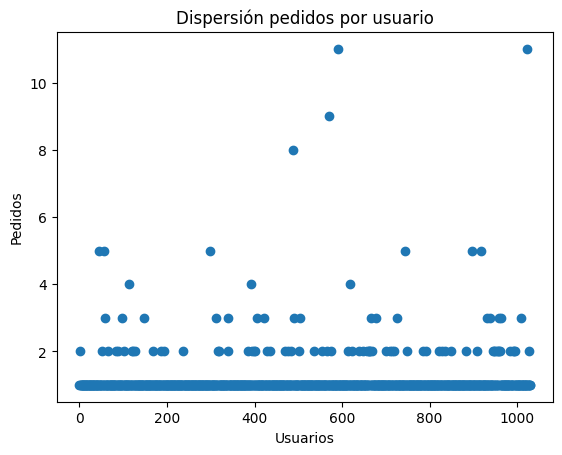

In [41]:
# Gráfico de dispoersión de número de pedidos

x_values_usuario = pd.Series(range(0,len(orders_usuario)))

plt.scatter(x_values_usuario, orders_usuario['orders'])

plt.title('Dispersión pedidos por usuario')
plt.xlabel('Usuarios')
plt.ylabel('Pedidos')

#### **Conclusiones: Dispersión número de pedidos por usuario**

* Existe una cantidad importante de usuarios con 2 o más pedidos.
* Existen usuarios con más de 10 pedidos.
* La mayoría de los usuarios realizan solo 1 pedido.

### **Percentiles del número de pedidos por usuario**

In [42]:
# Calcular los percentiles del número de pedidos por usuario

# Calcular los percentiles 90, 95 y 99

print('Percentiles 90, 95 y 99:', np.percentile(orders_usuario['orders'],[90, 95, 99]))

Percentiles 90, 95 y 99: [1. 2. 4.]


#### **Conclusiones: Percentiles dispersión número de pedidos por usuario**

* No más del 5% de los usuarios realizan más de 2 pedidos.
* No más del 1% de los usuarios realizan más de 4 pedidos.
* La mayoría de los usuarios realizan 1 pedido.


<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo revisando los percentiles, encontrar valores atípicos puede ser crucial al momento de mostrar métricas correctas ya que estos pueden afectar los resultados finales
</div>

### **Significancia estádistica de la conversión de los grupos con datos en bruto**

In [43]:
# Crear los grupos de los usuarios con al menos 1 pedido

# Grupo A

A_orders_usuario = orders_[orders_['group'] == 'A'].groupby('visitor_id', as_index = False).agg({'transaction_id' : pd.Series.nunique})

A_orders_usuario.columns = ['user_id', 'orders']

print('Grupo A: orders por usuario:')

print(A_orders_usuario.head(5))

print()

# Grupo B

B_orders_usuario = orders_[orders_['group'] == 'B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})

B_orders_usuario.columns = ['user_id', 'orders']

print('Grupo B: orders por usuario:')

print(B_orders_usuario.head(5))


Grupo A: orders por usuario:
    user_id  orders
0   8300375       1
1  11685486       1
2  54447517       1
3  66685450       1
4  78758296       1

Grupo B: orders por usuario:
    user_id  orders
0   5114589       1
1   6958315       1
2   8300375       1
3  39475350       1
4  47206413       1


In [44]:
# Crear las muestras A y B

# Muestra A

muestra_A = pd.concat([A_orders_usuario['orders'],pd.Series(0, index=np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(A_orders_usuario['orders'])), name = 'orders')],axis = 0)

# Muestra B

muestra_B = pd.concat([B_orders_usuario['orders'],pd.Series(0, index=np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(B_orders_usuario['orders'])), name = 'orders')],axis=0)

In [45]:
# Calcular la diferencia de la significancia estádistica

alpha = 0.05

valor_p = ("{0:.3f}".format(st.mannwhitneyu(muestra_A, muestra_B)[1]))

print('Valor p:', valor_p)

print()

print('Diferencia relativa del grupo B:')

print("{0:.3f}".format(muestra_B.mean() / muestra_A.mean() - 1))

Valor p: 0.017

Diferencia relativa del grupo B:
0.138


#### **Conclusiones: Significancia estádistica de la conversión de los grupos con datos en bruto**

De acuerdo a los datos en bruto:

* Podemos rechazar la hipótesis nula: 'No hay una diferencia estádisticamente significativa en la conversión entre los grupos' y a que el valor p es menor a 0.05.

* La ganancia relativa del grupo 'B' es del 13.8%

### **Significancia estádistica del tamaño promedio del pedido (revenue) con datos en bruto**

In [46]:
# Calcular la diferencia de la significancia estádistica

valor_p_revenue = ("{0:.3f}".format(st.mannwhitneyu(orders_[orders_['group'] == 'A']['order_revenue'], orders_[orders_['group'] == 'B']['order_revenue'])[1]))

print('Valor p:', valor_p)

print()

print('Diferencia relativa del grupo B:')

print("{0:.3f}".format(orders_[orders_['group'] == 'B']['order_revenue'].mean() / orders_[orders_['group'] == 'A']['order_revenue'].mean() - 1))

Valor p: 0.017

Diferencia relativa del grupo B:
0.252


#### **Conclusiones: Significancia estádistica del tamaño del pedido (revenue) con datos en bruto**

De acuerdo a los datos en bruto:

* Podemos rechazar la hipótesis nula: 'No hay una diferencia estádisticamente significativa en el tamaño del pedido (revenue) entre los grupos' ya que el valor p es menor a 0.05.

* La ganancia relativa del grupo 'B' es del 25.2%

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien realizada la aplicación de la prueba estadística, ahora hay que ver los resultados con los datos filtrados
    
</div>

### **Significancia estádistica de la conversión de los grupos con datos filtrados (sin atípicos)**

#### **Definición de usuarios anónalos:**

* Pedidos: usuarios con más de 2 pedidos (percentil 95)
* Monto pedidos: usuarios con más de: \$ 435.54 gastado (percentil 95) 

In [47]:
# Encontrar los usuarios anómalos

usuarios_muchas_orders = pd.concat([A_orders_usuario[A_orders_usuario['orders'] > 2]['user_id'], B_orders_usuario[B_orders_usuario['orders'] > 2]['user_id']], axis = 0)

usuarios_revenue_alto = orders_[orders_['order_revenue'] > 435.54]['visitor_id']

usuarios_anormales = pd.concat([usuarios_muchas_orders, usuarios_revenue_alto], axis = 0).drop_duplicates().sort_values()

print('Usuarios anormales:')

print()

print(usuarios_anormales.head(5))

print()

print(usuarios_anormales.shape)

 

Usuarios anormales:

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64

(74,)


Se cuenta con 74 usuarios anómalos identificados.

In [48]:
# Creación de muestras filtradas

# Muestra A filtrada

muestra_A_filtrada = pd.concat([A_orders_usuario[np.logical_not(A_orders_usuario['user_id'].isin(usuarios_anormales))]['orders'],pd.Series(0, index=np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(A_orders_usuario['orders'])),name = 'orders')],axis=0)

# Muestra B filtrada

muestra_B_filtrada = pd.concat([B_orders_usuario[np.logical_not(B_orders_usuario['user_id'].isin(usuarios_anormales))]['orders'],pd.Series(0, index=np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(B_orders_usuario['orders'])),name = 'orders')],axis=0)


print('Muestra A filtrada:')

print(muestra_A_filtrada.head(5))

print()

print('Muestra B filtrada:')

print(muestra_B_filtrada.head(5))


Muestra A filtrada:
0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

Muestra B filtrada:
0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64


In [49]:
# Calcular la diferencia de la significancia estádistica

valor_p_filtrada = ("{0:.3f}".format(st.mannwhitneyu(muestra_A_filtrada, muestra_B_filtrada)[1]))

print('Valor p:', valor_p_filtrada)

print()

print('Diferencia relativa del grupo B:')

print("{0:.3f}".format(muestra_B_filtrada.mean() / muestra_A_filtrada.mean() - 1))

Valor p: 0.013

Diferencia relativa del grupo B:
0.173


#### **Conclusiones: Significancia estádistica de la conversión de los grupos con datos filtrados**

De acuerdo a los datos en filtrados:

* Podemos rechazar la hipótesis nula: 'No hay una diferencia estádisticamente significativa en la conversión entre los grupos' y a que el valor p es menor a 0.05.

* La ganancia relativa del grupo 'B' es del 17.3%
* Los datos en general no tuvieron datos considerables contra los datos en bruto

### **Significancia estádistica del tamaño promedio del pedido (revenue) con datos en filtrados**

In [50]:
# Muestra el valor p calculado con la prueba U de Mann-Whitney

print('Valor p:')

print("{0:.3f}".format(st.mannwhitneyu(
orders_[np.logical_and(
orders_['group'] == 'A', # Selecciona datos en el grupo A
np.logical_not(orders_['visitor_id'].isin(usuarios_anormales)))]['order_revenue'], # Excluye los usuarios anormales y selecciona los datos de ingreso para el grupo A
orders_[np.logical_and(
orders_['group'] == 'B', # Selecciona datos en el grupo B
np.logical_not(orders_['visitor_id'].isin(usuarios_anormales)))]['order_revenue'] # Excluye los usuarios anormales y selecciona los datos de ingreso para el grupo B
)[1])) # Extrae el valor p de los resultados de la prueba

print()

# Muestra la diferencia relativa en el ingreso medio entre los grupos B y A

print('Diferencia relativa:')

print("{0:.3f}".format(
orders_[np.logical_and(orders_['group'] == 'B', # Selecciona datos en el grupo B
np.logical_not(orders_['visitor_id'].isin(usuarios_anormales)))]['order_revenue'].mean() / # Calcula el ingreso medio para el grupo B
orders_[np.logical_and(orders_['group'] == 'A', # Selecciona datos en el grupo A
np.logical_not(orders_['visitor_id'].isin(usuarios_anormales)))]['order_revenue'].mean() - 1)) # Calcula el ingreso medio para el grupo A y muestra la diferencia relativa


Valor p:
0.788

Diferencia relativa:
-0.019


#### **Conclusiones: Significancia estádistica del tamaño del pedido (revenue) con datos filtrados**

De acuerdo a los datos filtrados:

* NO podemos rechazar la hipótesis nula: 'No hay una diferencia estádisticamente significativa en el tamaño del pedido (revenue) entre los grupos' ya que el valor p es mayor a 0.05.

* A diferencia que con los datos brutos, el valor p aumentó.

* La diferencia relativa del grupo 'B' es del -1.9%

## **Conclusiones de la prueba**


Después de realizar los análisis estadísticos con datos filtrados encontramos:

* No existen diferencias significativas en cuanto al tamaño del pedido promedio por usuario entre los grupos. 
* Existen diferencias significativas en cuanto a las tasas de conversión entre los grupos, el grupo B tiene una mejor tasa de conversión.
* Aunque los datos en bruto muestran una mejora considerable en los usuarios del grupo ‘B’ esta se encuentra altamente influenciada por los datos atípicos.

**Se recomienda para la prueba bajo los siguientes escenarios:**

* **Objetivo de la prueba: Mejorar la tasa de conversión de los usuarios visitantes a la tienda online.**

En este caso, se podría considerar la prueba un éxito para el grupo 'B' ya que los cambios realizados lograron alcanzar una diferencia significativa en la tasa de conversión.

* **Objetivo de la prueba: Mejorar el tamaño de la compra (revenue) por usuario.**

Bajo este escenario, las diferencias del tamaño promedio de la compra no lograron ser significativas, ligeramente mas bajas para el grupo 'B', aunque a primera vista con los datos brutos pareciera lo contrario, al descartar los eventos atípicos, no es así.


<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Hiciste un buen trabajo con las visualizaciones, los cálculos y  los ejercicios propuestos los has resuelto muy bien planteando conclusiones claras sobre los resultados obtenidos en cada paso.
    
Planteaste muy buenas conclusiones en base a tus datos que es un punto importante que deben tener tus proyectos, como Data Analyst debes buscar apoyar en la toma de decisiones basadas en datos.
    
Saludos!
</div>